<a href="https://colab.research.google.com/github/jaehoo0726/Colab_Titanic/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

# READ DATA+ Cabin 선언 + info, null check + train.dropna()

---
train: drop O

---
data: drop X

In [2]:
df = pd.read_csv('train.csv')

In [3]:
train = df.copy()

In [4]:
data = df.copy()

In [5]:
Cabin = ["G","F","E","D","C","B","A"]
Embark_list = ['C', 'Q', 'S']

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

embarked(탑승한 항구) null 찾기

In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train['Cabin'].value_counts().sort_index()

A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Cabin, Length: 147, dtype: int64

In [11]:
train.dropna(axis = 0, inplace = True)

In [12]:
Cabin_list = train['Cabin'].unique()
Cabin_list.sort()
Cabin_list

array(['A10', 'A16', 'A20', 'A23', 'A24', 'A26', 'A31', 'A34', 'A36',
       'A5', 'A6', 'A7', 'B101', 'B18', 'B19', 'B20', 'B22', 'B3', 'B30',
       'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50',
       'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73',
       'B77', 'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101',
       'C103', 'C104', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30', 'C32',
       'C45', 'C46', 'C49', 'C50', 'C52', 'C54', 'C62 C64', 'C65', 'C68',
       'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86', 'C87', 'C90',
       'C91', 'C92', 'C93', 'C99', 'D', 'D10 D12', 'D11', 'D15', 'D17',
       'D19', 'D20', 'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D37',
       'D46', 'D47', 'D48', 'D49', 'D50', 'D56', 'D6', 'D7', 'D9', 'E10',
       'E101', 'E12', 'E121', 'E17', 'E24', 'E25', 'E31', 'E33', 'E34',
       'E36', 'E38', 'E40', 'E44', 'E46', 'E49', 'E50', 'E58', 'E

In [13]:
train['Cabin'].unique().size

133

# 항구별 캐빈으로 분류하기

---
groupbyEmbark(x)

In [14]:
def groupbyEmbark(x):
  x_byEmbark = x.groupby('Embarked')
  for i in Cabin:
    globals()['{}_Cherbourg'.format(i)] = x_byEmbark.get_group('C')
    globals()['{}_Queen'.format(i)] = x_byEmbark.get_group('Q')
    globals()['{}_Soton'.format(i)] = x_byEmbark.get_group('S')

In [15]:
groupbyEmbark(train)

In [16]:
A_Queen

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


# 항구명_갑판층 --> 해당 인원 처리

---
makeCabinvar(x)

In [17]:
def makeCabinvar(x):  
  x_byEmbark = x.groupby('Embarked')
  for e in Embark_list:
    dt = x_byEmbark.get_group(e)

    for i in Cabin:
        globals()['{}_{}'.format(e,i)] = dt[dt['Cabin'].str.contains(i)].shape[0]
        globals()['{}_{}dt'.format(e,i)] = dt[dt['Cabin'].str.contains(i)]
    globals()['{}_etc'.format(e)] = dt[~dt['Cabin'].str.contains('A|B|C|D|E|F|G')]

In [18]:
makeCabinvar(train)

In [19]:
C_Adt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C


Southamton 하나만 존재

# 항구별 Cabin 비율 시각화


---
makechart(), 
comparechart()

In [20]:
def makechart():
  x1 = {'#':[C_A, C_B, C_C, C_D, C_E, C_F, C_G]}
  C = pd.DataFrame(x1, index = ['C_A', 'C_B', 'C_C', 'C_D', 'C_E', 'C_F', 'C_G'])
  x2 = {'#':[Q_A, Q_B, Q_C, Q_D, Q_E, Q_F, Q_G]}
  Q = pd.DataFrame(x2, index = ['Q_A', 'Q_B', 'Q_C', 'Q_D', 'Q_E', 'Q_F', 'Q_G'])
  x3 = {'#':[S_A, S_B, S_C, S_D, S_E, S_F, S_G]}
  S = pd.DataFrame(x3, index = ['S_A', 'S_B', 'S_C', 'S_D', 'S_E', 'S_F', 'S_G'])

  plt.figure(figsize = (10,12))

  plt.subplot(3,1,1)
  plt.bar(C.index, C['#'])
  plt.xticks(C.index, fontsize=15)
  plt.title('Cherbourg Cabin')

  plt.subplot(3,1,2)
  plt.bar(Q.index, Q['#'])
  plt.xticks(Q.index, fontsize=15)
  plt.title('Queenstown Cabin')

  plt.subplot(3,1,3)
  plt.bar(S.index, S['#'])
  plt.xticks(S.index, fontsize=15)
  plt.title('Southampton Cabin')

  plt.show()

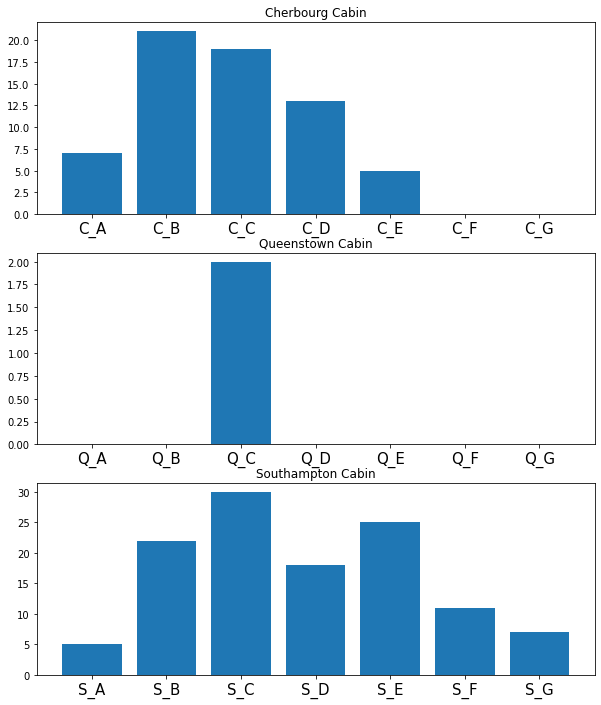

In [21]:
makechart()

In [22]:
  x1 = {'#':[C_A, C_B, C_C, C_D, C_E, C_F, C_G]}
  C = pd.DataFrame(x1, index = ['C_A', 'C_B', 'C_C', 'C_D', 'C_E', 'C_F', 'C_G'])
  C['#']

C_A     7
C_B    21
C_C    19
C_D    13
C_E     5
C_F     0
C_G     0
Name: #, dtype: int64

In [23]:
def comparechart():
  x1 = {'#':[C_A, C_B, C_C, C_D, C_E, C_F, C_G]}
  C = pd.DataFrame(x1, index = ['C_A', 'C_B', 'C_C', 'C_D', 'C_E', 'C_F', 'C_G'])
  x2 = {'#':[Q_A, Q_B, Q_C, Q_D, Q_E, Q_F, Q_G]}
  Q = pd.DataFrame(x2, index = ['Q_A', 'Q_B', 'Q_C', 'Q_D', 'Q_E', 'Q_F', 'Q_G'])
  x3 = {'#':[S_A, S_B, S_C, S_D, S_E, S_F, S_G]}
  S = pd.DataFrame(x3, index = ['S_A', 'S_B', 'S_C', 'S_D', 'S_E', 'S_F', 'S_G'])
  
  label = C.index
  plt.figure(figsize = (9,5))

  plt.bar(np.arange(len(label))-0.3, C['#'], width=0.3, color='b')
  plt.bar(np.arange(len(label)), S['#'], width=0.3, color='r')
  plt.bar(np.arange(len(label))+0.3, Q['#'], width=0.3, color='g')

  indexname= reversed(Cabin)
  plt.xticks(np.arange(len(label)), indexname, fontsize=9)
  plt.title('Comparison')

  plt.show()

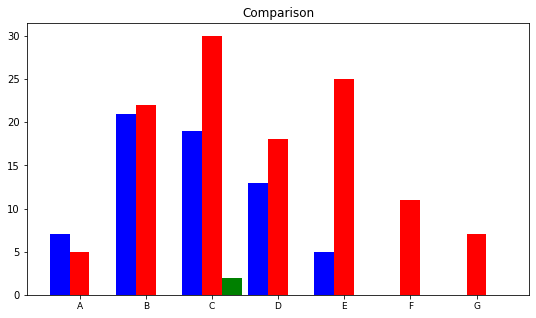

In [24]:
comparechart()

# Room No. -> Cabin Floor

---
데이터명.컬럼명.apply(roomtofloor)

data: null drop 없음

In [25]:
data_Cabin = data

In [26]:
data_Cabin['Cabin'] = data_Cabin['Cabin'].fillna('-')
data_Cabin.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,-,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,-,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,-,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,-,C


In [27]:
def roomtofloor(x):
  for i in Cabin:
    if i in x:
      return i;
  if '-' in x:
      return np.NaN;
  elif x not in Cabin:
    return 'etc';

In [28]:
data_Cabin['Cabin'] = data_Cabin.Cabin.apply(roomtofloor)

In [29]:
data_Cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


# Cabin으로 분류하기

---
groupbyCabin(x)

In [30]:
def groupbyCabin(x):
  x_byCabin = x.groupby('Cabin')
  for i in Cabin:
    globals()['{}_dt'.format(i)] = x_byCabin.get_group(i)
    globals()['{}'.format(i)] = x_byCabin.get_group(i).shape[0]

In [31]:
groupbyCabin(data_Cabin)

In [32]:
A

15

# 상관관계 찾기

갑판과 등급, 갑판과 가격의 상관관계

In [33]:
data_Cabin.groupby(['Cabin', 'Sex']).sum()

PassengerId  Survived  Pclass     Age  SibSp  Parch       Fare
Cabin Sex                                                                   
A     female          557         1       1   48.00      1      0    39.6000
      male           6037         6      14  490.00      1      2   554.7583
B     female        13845        27      27  810.00     10     18  3126.6833
      male          10680         8      20  763.00      7      9  2208.0876
C     female        10803        24      27  849.00     21     13  3165.1166
      male          13177        11      32  991.42     17     15  2743.8125
D     female         8791        18      20  674.00     10      4  1093.9793
      male           6915         7      17  536.00      4      6   795.0917
E     female         7604        14      21  444.50      5      8   846.2125
      male           8474        10      21  699.00      5      2   626.6417
F     female         1678         5      11   91.00      3      2    95.3583
      male           1645         3      11   42.50      4      5   124.7500
G     female          864         2      12   59.00      2      5    54.3250
      male           1492         0       9   86.00      0      0    22.9500
etc   male            340         0       1   45.00      0      0    35.5000

등급과 가격의 상관관계

In [34]:
data_Cabin.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


각 갑판

In [35]:
dt = data_Cabin.dropna(subset=['Age','Cabin'])

In [36]:
for i in Cabin:
    globals()['data_{}'.format(i)] = dt[dt['Cabin'].str.contains(i)].shape[0]
    globals()['data_{}dt'.format(i)] = dt[dt['Cabin'].str.contains(i)]
    globals()['{}_ratio'.format(i)] = dt[dt['Cabin'].str.contains(i)]['Sex'].value_counts()

# 갑판과 성별 상관관계 시각화

---
roomtofloor -> Cabin_Sex_pie(데이터명)

In [37]:
def Cabin_Sex_pie(x):
  fig, ax = plt.subplots(1, 7, figsize=(27,8))
  a=0
  for i in Cabin:
    i_ratio = x[x['Cabin'].str.contains(i)]['Sex'].value_counts().sort_index()
    ax[a].pie(i_ratio, labels=i_ratio.index, autopct='%.1f%%')
    ax[a].set_title('{} Cabin ratio'.format(i))
    a=a+1


  plt.show()

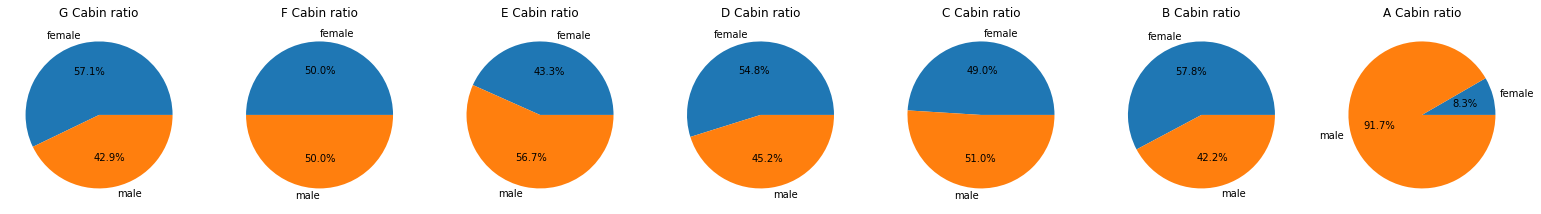

In [38]:
Cabin_Sex_pie(dt)

# 결측치 예측

---
test(x,y,p,q)--x는 독립변수 list, y는 종속변수 string, p=130 , q=74

---
z = fillblank(x,y,z)

결측치 예측 - 성별, 가격, 등급, 가족,생존율

우선 알고있는 결과값으로 어느 부분을 학습해야 정확도가 높은지 확인

In [39]:
def test(x,y,p,q):
  global data
  data_for_test = data.copy()[data[y].notnull()]
  data_for_test.drop(data_for_test.loc[data_for_test[y]=='etc'].index, inplace=True)

  Cabin_train = data_for_test[x+[y]].head(p)
  Cabin_train = pd.get_dummies(Cabin_train)
  Cabin_test = data_for_test[x+[y]].tail(q)
  Cabin_test = pd.get_dummies(Cabin_test)

  train_column = data_for_test[x].head(p)
  train_column = pd.get_dummies(train_column)
  test_column = data_for_test[x].tail(q)
  test_column = pd.get_dummies(test_column)


  x1 = list(train_column.columns)
  x2 = list(test_column.columns)

  train_real = Cabin_train.drop(columns = x1)
  Cabin_sheet = Cabin_test.drop(columns = x2)

  s = set(Cabin_test.index)
  fit_column = [x for x in list(Cabin_train.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_test = pd.concat([test_column, sheet_fit]).fillna(0)
  s = set(Cabin_sheet.index)
  fit_column = [x for x in list(train_real.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_sheet = pd.concat([Cabin_sheet, sheet_fit])

  s = set(x1)
  x3 = [x for x in x2 if x not in s]
  x1.extend(x3);
  s = set(x2)
  x4 = [x for x in x1 if x not in s]
  x2.extend(x4);

  if len(fit_column) == 1:
    model=RandomForestClassifier(n_estimators=100)
    model.fit(Cabin_train[x1],train_real.values.ravel())
  else:
    model=RandomForestClassifier(n_estimators=100)
    model.fit(Cabin_train[x1],train_real)

  Cabin_predtest = model.predict(Cabin_test[x1])

  Cabin_predtest = pd.DataFrame(Cabin_predtest, columns = train_real.columns,index=Cabin_sheet.index)

  Cabin_compare = Cabin_sheet.compare(pd.DataFrame(Cabin_predtest))
  a = Cabin_compare.count().sum() #(두배로 뻥튀기됨. /2해야함)
  b = Cabin_sheet.size

  return (b-(a/2))/b

In [40]:
def fillblank(x,y,z):
  global data
  data_notblank = z.copy()[z[y].notnull()]
  data_notblank.drop(data_notblank.loc[data_notblank[y]=='etc'].index, inplace=True)
  data_blank = z.copy()[z[y].isnull()]

  Cabin_train = data_notblank[x+[y]]
  Cabin_train = pd.get_dummies(Cabin_train)
  Cabin_test = data_blank[x+[y]]
  Cabin_test = pd.get_dummies(Cabin_test)

  train_column = data_notblank[x]
  train_column = pd.get_dummies(train_column)
  test_column = data_blank[x]
  test_column = pd.get_dummies(test_column)


  x1 = list(train_column.columns)
  x2 = list(test_column.columns)

  train_real = Cabin_train.drop(columns = x1)
  Cabin_sheet = Cabin_test.drop(columns = x2)

  s = set(Cabin_sheet.index)
  fit_column = [x for x in list(train_real.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_sheet = pd.concat([Cabin_sheet, sheet_fit])

  s = set(Cabin_test.index)
  fit_column = [x for x in list(Cabin_train.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_test = pd.concat([test_column, sheet_fit]).fillna(0)

  s = set(x1)
  x3 = [x for x in x2 if x not in s]
  x1.extend(x3);
  s = set(x2)
  x4 = [x for x in x1 if x not in s]
  x2.extend(x4);



  model=RandomForestClassifier(n_estimators=100)
  model.fit(Cabin_train[x1],train_real)
  Cabin_predtest = model.predict(Cabin_test[x1])
  result = pd.DataFrame(Cabin_predtest, columns = train_real.columns,index=Cabin_sheet.index)

  result = result.idxmax(axis=1)
  z = z.replace('Blank', np.NaN)
  z[y]
  new_Cabin = pd.concat([z[y], result]).dropna().sort_index()
  z[y] = new_Cabin
  return z;

# Embarked 결측치 채우기

In [41]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
Category = ['Sex','Survived','SibSp','Parch','Fare','Pclass']
Category_list = []
for i in range(2,7):
  Category_list += list(combinations(Category, i))

In [43]:
score = 0.0000000000000001
for i in Category_list:
  i = list(i)
  for t in range (1,6):
    globals()["s{}".format(t)]= test(i, 'Embarked',500,389)
  now = (s1+s2+s3+s4+s5)/5
  if score <= now:
    score = now
    print(i, score);

['Sex', 'Survived'] 0.8149100257069408
['Sex', 'Parch'] 0.8149100257069408
['Sex', 'Fare'] 0.8726649528706083
['Survived', 'Fare'] 0.904541559554413
['Parch', 'Fare'] 0.9050556983718938
['Fare', 'Pclass'] 0.9228791773778919


['Fare', 'Pclass']

# Blank 채우기

In [44]:
data = fillblank(['Fare', 'Pclass'],'Embarked',data)

In [45]:
def Embarkedname(x):
  for i in ['S','Q','C']:
    if i in x:
      return i;

In [46]:
data['Embarked'] = data['Embarked'].fillna('-')

In [47]:
data['Embarked'] = data.Embarked.apply(Embarkedname)

In [48]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Age 결측치 채우기
testRegressor(x,y,p,q)

In [50]:
def testRegressor(x,y,p,q):
  global data

  data_for_test = data.copy()[data[y].notnull()]
  data_for_test.drop(data_for_test.loc[data_for_test[y]=='etc'].index, inplace=True)

  Cabin_train = data_for_test[x+[y]].head(p)
  Cabin_train = pd.get_dummies(Cabin_train)
  Cabin_test = data_for_test[x+[y]].tail(q)
  Cabin_test = pd.get_dummies(Cabin_test)

  
  train_column = data_for_test[x].head(p)
  train_column = pd.get_dummies(train_column)
  test_column = data_for_test[x].tail(q)
  test_column = pd.get_dummies(test_column)


  x1 = list(train_column.columns)
  x2 = list(test_column.columns)

  train_real = Cabin_train.drop(columns = x1)
  Cabin_sheet = Cabin_test.drop(columns = x2)

  s = set(Cabin_sheet.index)
  fit_column = [x for x in list(train_real.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_sheet = pd.concat([Cabin_sheet, sheet_fit])

  s = set(Cabin_test.index)
  fit_column = [x for x in list(Cabin_train.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_test = pd.concat([test_column, sheet_fit]).fillna(0)

  s = set(x1)
  x3 = [x for x in x2 if x not in s]
  x1.extend(x3);
  s = set(x2)
  x4 = [x for x in x1 if x not in s]
  x2.extend(x4);


  model=RandomForestRegressor(n_estimators=100)
  model.fit(Cabin_train[x1],train_real.values.ravel())

  Cabin_predtest = model.predict(Cabin_test[x1])

  Cabin_predtest = pd.DataFrame(Cabin_predtest, columns = train_real.columns,index=Cabin_sheet.index)
  Cabin_compare = Cabin_sheet.compare(pd.DataFrame(Cabin_predtest))

  result = Cabin_predtest.sub(Cabin_sheet).abs()

  return  result.mean().mean();

In [51]:
Category = ['Sex','Survived','SibSp','Parch','Fare','Pclass','Embarked']
Category_list = []
for i in range(2,8):
  Category_list += list(combinations(Category, i))

In [52]:
score= 15
for i in Category_list:
  i = list(i)
  for t in range (1,6):
    globals()["r{}".format(t)]= testRegressor(i, 'Age',450,264)
  now = (r1+r2+r3+r4+r5)/5
  if score >= now:
    score = now
    print(i, score);

['Sex', 'Survived'] 11.679859318271955
['Sex', 'SibSp'] 10.955479843827781
['Sex', 'Pclass'] 10.512122107334775
['Survived', 'Pclass'] 10.4679848245957
['SibSp', 'Pclass'] 10.332775034920065
['Parch', 'Pclass'] 9.939916420402971
['Survived', 'Parch', 'Pclass'] 9.870241067598048
['Sex', 'Survived', 'SibSp', 'Pclass'] 9.856084982104331
['Sex', 'Survived', 'Parch', 'Pclass'] 9.652390843457404
['Sex', 'Survived', 'SibSp', 'Parch', 'Pclass'] 9.518620080824977


['Sex', 'Survived', 'SibSp', 'Parch', 'Pclass'] 9.53383931274482

# Blank 채우기


---
fillblankRegressor(x,y,데이터)

In [53]:
def fillblankRegressor(x,y,z):
  global data
  data_notblank = z.copy()[z[y].notnull()]
  data_notblank.drop(data_notblank.loc[data_notblank[y]=='etc'].index, inplace=True)
  data_blank = z.copy()[z[y].isnull()]

  Cabin_train = data_notblank[x+[y]]
  Cabin_train = pd.get_dummies(Cabin_train)
  Cabin_test = data_blank[x+[y]]
  Cabin_test = pd.get_dummies(Cabin_test)
  
  train_column = data_notblank[x]
  train_column = pd.get_dummies(train_column)
  test_column = data_blank[x]
  test_column = pd.get_dummies(test_column)


  x1 = list(train_column.columns)
  x2 = list(test_column.columns)

  train_real = Cabin_train.drop(columns = x1)
  Cabin_sheet = Cabin_test.drop(columns = x2)

  s = set(Cabin_sheet.index)
  fit_column = [x for x in list(train_real.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_sheet = pd.concat([Cabin_sheet, sheet_fit])

  s = set(Cabin_test.index)
  fit_column = [x for x in list(Cabin_train.columns) if x not in s]
  sheet_fit = pd.DataFrame(columns = fit_column, index = [])
  Cabin_test = pd.concat([test_column, sheet_fit]).fillna(0)

  s = set(x1)
  x3 = [x for x in x2 if x not in s]
  x1.extend(x3);
  s = set(x2)
  x4 = [x for x in x1 if x not in s]
  x2.extend(x4);

  model=RandomForestRegressor(n_estimators=100)
  model.fit(Cabin_train[x1],train_real)

  predtest = model.predict(Cabin_test[x1])

  result = pd.DataFrame(predtest, columns = train_real.columns,index=Cabin_sheet.index).round(1)

  new = pd.concat([z[y], result[y]]).dropna().sort_index()

  z[y] = new
  
  return z;

In [54]:
data = fillblankRegressor(['Sex', 'Survived', 'SibSp', 'Parch', 'Pclass'],'Age',data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [55]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [56]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


# Cabin 예측

In [57]:
Category = ['Sex','Survived','SibSp','Parch','Fare','Pclass','Embarked','Age']
Category_list = []
for i in range(2,9):
  Category_list += list(combinations(Category, i))

In [58]:
score = 0.0000000000000001
for i in Category_list:
  i = list(i)
  for t in range (1,6):
    globals()["s{}".format(t)]= test(i, 'Cabin',130,74)
  now = (s1+s2+s3+s4+s5)/5
  if score <= now:
    score = now
    print(i, score);

['Sex', 'Survived'] 0.8552123552123552
['Sex', 'Fare'] 0.8555984555984555
['Survived', 'Fare'] 0.8602316602316602
['Fare', 'Pclass'] 0.8714285714285716
['Fare', 'Embarked'] 0.8787644787644787
['Fare', 'Pclass', 'Embarked'] 0.87992277992278


['Fare', 'Pclass', 'Embarked'] 0.87992277992278

---
가장 정확도가 높음

# 따라서 Blank 에도 적용

---

In [59]:
data = fillblank(['Fare', 'Pclass', 'Embarked'], 'Cabin', data)

In [60]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Cabin_G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Cabin_E,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Cabin_E,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Cabin_A,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.5,1,2,W./C. 6607,23.4500,Cabin_G,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


#data - Cabin 채우기 후처리

In [61]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [62]:
data['Cabin'] = data['Cabin'].fillna('-')

In [63]:
data['Cabin'] = data.Cabin.apply(roomtofloor)

# data = 결측치 모두 채움

# Cabin nan 채운 후 Cabin 성별 비율

In [64]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.5,1,2,W./C. 6607,23.4500,G,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


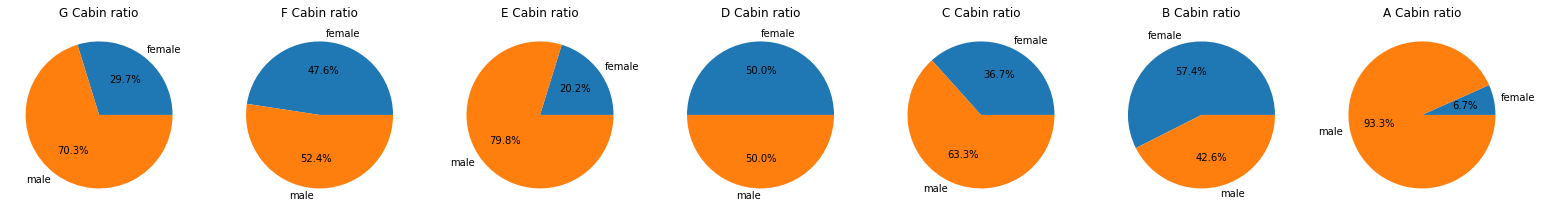

In [65]:
Cabin_Sex_pie(data)

# Cabin nan 채운 후 항구별 Cabin 비율

참고: Cabin = ["G","F","E","D","C","B","A"]

In [66]:
makeCabinvar(data)

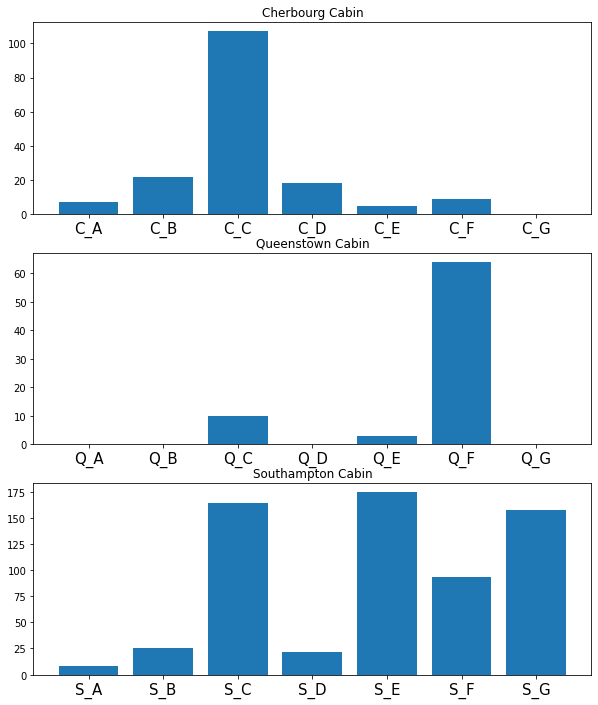

In [67]:
makechart()

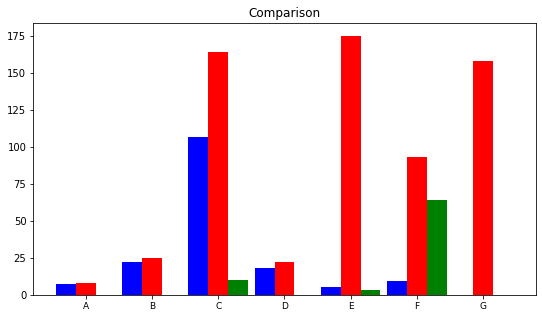

In [68]:
comparechart()

# Cabin 비율

In [69]:
R_data=df.copy()
R_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [70]:
R_data['Cabin'] = R_data['Cabin'].fillna('-')

In [71]:
R_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,-,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
R_data['Cabin'] = R_data.Cabin.apply(roomtofloor)
R_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [73]:
groupbyCabin(R_data)

In [74]:
A

15

Text(0.5, 1.0, 'Cabin')

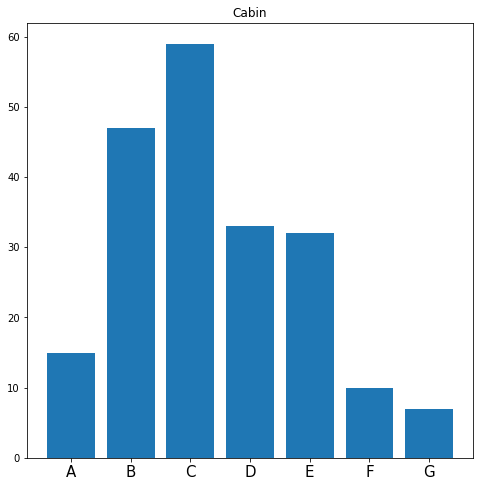

In [75]:
x = {'#':[A, B, C, D, E, F, G]}
y = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
X = pd.DataFrame(x, index=y)
plt.figure(figsize = (8,8))
plt.bar(X.index, X['#'])
plt.xticks(y, fontsize=15)
plt.title('Cabin')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


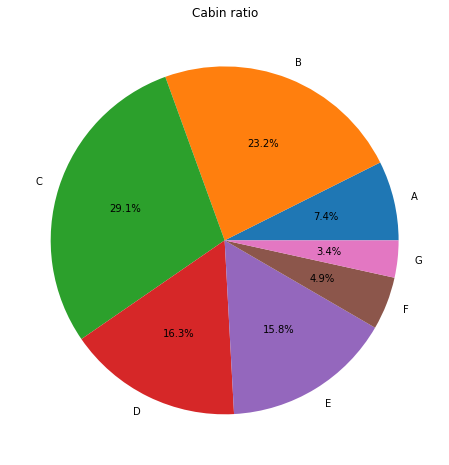

In [76]:
plt.figure(figsize=(8,8))
ratio = X
plt.pie(ratio, labels=ratio.index, autopct='%.1f%%')
plt.title('Cabin ratio')

plt.show()

# 예측

---
data : train 데이터
test_data : test 데이터

# test_data 값 일관되게 맞춰주기

In [102]:
test_data = pd.read_csv('test.csv')

In [103]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [104]:
test_data['Cabin'] = test_data['Cabin'].fillna('-')
test_data['Cabin'] = test_data.Cabin.apply(roomtofloor)

# test_data 결측치 예측

# Fare 예측

In [105]:
Category = ['Sex','SibSp','Parch','Embarked','Pclass','Age','Cabin']
Category_list = []
for i in range(2,8):
  Category_list += list(combinations(Category, i))

In [106]:
score= 15
for i in Category_list:
  i = list(i)
  for t in range (1,6):
    globals()["s{}".format(t)]= testRegressor(i, 'Fare',600,291)
  now = (s1+s2+s3+s4+s5)/5
  if score >= now:
    score = now
    print(i, score);

['Sex', 'SibSp', 'Parch', 'Pclass'] 14.453119500740266
['Sex', 'SibSp', 'Parch', 'Embarked', 'Pclass'] 14.230644788608462
['Sex', 'SibSp', 'Parch', 'Pclass', 'Cabin'] 13.5453189552836
['Sex', 'SibSp', 'Parch', 'Embarked', 'Pclass', 'Cabin'] 12.919326986085187


['Sex', 'SibSp', 'Parch', 'Embarked', 'Pclass', 'Cabin'] 12.919326986085187
Fare 채우기

In [107]:
test_data = fillblankRegressor(['Sex', 'SibSp', 'Parch', 'Embarked', 'Pclass', 'Cabin'],'Fare',test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [108]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Cabin 예측

In [109]:
Category = ['Sex','SibSp','Parch','Embarked','Pclass','Fare','Age']
Category_list = []
for i in range(2,8):
  Category_list += list(combinations(Category, i))

In [110]:
score = 0.0000000000000001
for i in Category_list:
  i = list(i)
  for t in range (1,6):
    globals()["s{}".format(t)]= test(i, 'Cabin',600,291)
  now = (s1+s2+s3+s4+s5)/5
  if score <= now:
    score = now
    print(i, score);

['Sex', 'SibSp'] 0.8590083456062837


KeyboardInterrupt: ignored

['SibSp', 'Parch', 'Embarked', 'Pclass', 'Fare'] 0.9107142857142857 채우기

---
['SibSp', 'Parch', 'Fare'] 0.9087301587301587
['SibSp', 'Parch', 'Fare'] 0.9103174603174603

---
['Sex', 'SibSp', 'Parch', 'Pclass', 'Fare'] 0.9111111111111111

In [ ]:
test_data = fillblank(['Sex', 'SibSp', 'Parch', 'Fare'], 'Cabin', test_data)

후처리

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data['Cabin'] = test_data['Cabin'].fillna('-')

In [ ]:
test_data['Cabin'] = test_data.Cabin.apply(roomtofloor)

In [ ]:
test_data

# Age 예측

In [ ]:
Category = ['Sex','SibSp','Parch','Embarked','Pclass','Fare','Cabin']
Category_list = []
for i in range(2,8):
  Category_list += list(combinations(Category, i))

In [ ]:
score= 15
for i in Category_list:
  i = list(i)
  for t in range (1,6):
    globals()["s{}".format(t)]= testRegressor(i, 'Age',600,291)
  now = (s1+s2+s3+s4+s5)/5
  if score >= now:
    score = now
    print(i, score);

['SibSp', 'Parch', 'Pclass'] 8.65692108503037

In [ ]:
test_data = fillblankRegressor(['SibSp', 'Parch', 'Pclass'],'Age',test_data)

In [ ]:
test_data.isnull().sum()

# test_data 결측치 처리 완료

# 생존자 예측

In [ ]:
Category = ['Sex','SibSp','Parch','Embarked','Pclass','Cabin','Fare','Age']
Category_list = []
for i in range(2,9):
  Category_list += list(combinations(Category, i))

In [ ]:
score = 0.0000000000000001
for i in Category_list:
  i = list(i)
  for t in range (1,6):
    globals()["s{}".format(t)]= test(i, 'Survived',600,291)
  now = (s1+s2+s3+s4+s5)/5
  if score <= now:
    score = now
    print(i, score);

['Sex', 'Parch', 'Pclass', 'Cabin', 'Fare', 'Age'] 0.902405498281787
['Sex', 'SibSp', 'Parch', 'Pclass', 'Cabin', 'Fare'] 0.9010309278350516


# 예측 모델 학습(베이스라인)

In [ ]:
Raw = data.copy()

In [ ]:
Raw.loc[Raw['Cabin'] == 'etc']

In [ ]:
z=Raw
x=['Sex', 'Parch', 'Pclass', 'Cabin', 'Fare', 'Age']
y='Survived'

In [ ]:
data_notblank = z.copy()
data_notblank.drop(data_notblank.loc[data_notblank[y]=='etc'].index, inplace=True)
data_blank = test_data.copy()

Cabin_train = data_notblank[x+[y]]
Cabin_train = pd.get_dummies(Cabin_train)
Cabin_test = data_blank[x]
Cabin_test = pd.get_dummies(Cabin_test)

train_column = data_notblank[x]
train_column = pd.get_dummies(train_column)
test_column = data_blank[x]
test_column = pd.get_dummies(test_column)

x1 = list(train_column.columns)
x2 = list(test_column.columns)

train_real = Cabin_train.drop(columns = x1)
Cabin_sheet = Cabin_test.drop(columns = x2)

s = set(Cabin_sheet.index)
fit_column = [x for x in list(train_real.columns) if x not in s]
sheet_fit = pd.DataFrame(columns = fit_column, index = [])
Cabin_sheet = pd.concat([Cabin_sheet, sheet_fit])

s = set(Cabin_test.index)
fit_column = [x for x in list(Cabin_train.columns) if x not in s]
sheet_fit = pd.DataFrame(columns = fit_column, index = [])
Cabin_test = pd.concat([test_column, sheet_fit]).fillna(0)

s = set(x1)
x3 = [x for x in x2 if x not in s]
x1.extend(x3);
s = set(x2)
x4 = [x for x in x1 if x not in s]
x2.extend(x4);

model=RandomForestClassifier(n_estimators=100)
model.fit(Cabin_train[x1],train_real)
Cabin_predtest = model.predict(Cabin_test[x1])
result = pd.DataFrame(Cabin_predtest, columns = train_real.columns,index=Cabin_sheet.index)


submission = pd.read_csv("submission.csv")
submission['Survived'] = result.astype(int)

In [ ]:
submission

In [ ]:
submission.to_csv('최종 예측.csv', index = False)